<a href="https://colab.research.google.com/github/TaraRasti/Deep_Learning_F20_Assignments/blob/master/Assignment_6/cifar10dataAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np

from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [20]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


Example training images and their labels: [6, 9, 9, 4, 1]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile']


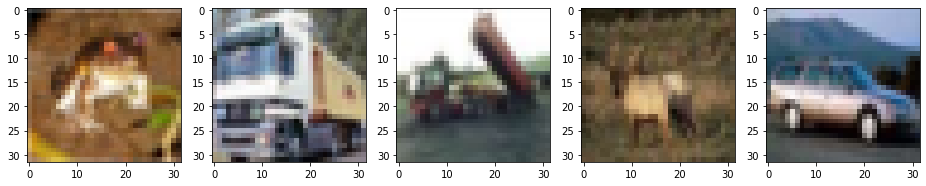

In [13]:
import matplotlib.pyplot as plt

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:5]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[0:5]]))

f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)

for i in range(5):
    img = X_train[i]
    axarr[i].imshow(img)
plt.show()

In [21]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [22]:
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

In [23]:
history = model.fit(X_train, y_train, batch_size=32, epochs=15, verbose=2, validation_split=0.2)

Epoch 1/15
1250/1250 - 5s - loss: 1.5853 - accuracy: 0.4252 - val_loss: 1.2851 - val_accuracy: 0.5357
Epoch 2/15
1250/1250 - 4s - loss: 1.1234 - accuracy: 0.6013 - val_loss: 1.0420 - val_accuracy: 0.6312
Epoch 3/15
1250/1250 - 4s - loss: 0.8827 - accuracy: 0.6895 - val_loss: 0.9620 - val_accuracy: 0.6608
Epoch 4/15
1250/1250 - 4s - loss: 0.6692 - accuracy: 0.7642 - val_loss: 1.0393 - val_accuracy: 0.6529
Epoch 5/15
1250/1250 - 4s - loss: 0.4603 - accuracy: 0.8384 - val_loss: 1.0591 - val_accuracy: 0.6686
Epoch 6/15
1250/1250 - 4s - loss: 0.2964 - accuracy: 0.8972 - val_loss: 1.3194 - val_accuracy: 0.6555
Epoch 7/15
1250/1250 - 4s - loss: 0.2082 - accuracy: 0.9273 - val_loss: 1.4962 - val_accuracy: 0.6638
Epoch 8/15
1250/1250 - 4s - loss: 0.1434 - accuracy: 0.9502 - val_loss: 1.7893 - val_accuracy: 0.6515
Epoch 9/15
1250/1250 - 4s - loss: 0.1227 - accuracy: 0.9575 - val_loss: 1.7981 - val_accuracy: 0.6655
Epoch 10/15
1250/1250 - 4s - loss: 0.1171 - accuracy: 0.9603 - val_loss: 2.1139 - 

In [25]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

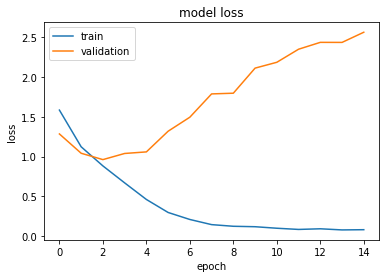

In [26]:
plotLosses(history)

In [27]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [28]:
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[2.583409070968628, 0.635200023651123]


In [29]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True)   # flip images horizontally

validation_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train[:40000], y_train[:40000], batch_size=32)
validation_generator = validation_datagen.flow(X_train[40000:], y_train[40000:], batch_size=32)

In [30]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True)   # flip images horizontally

validation_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train[:40000], y_train[:40000], batch_size=32)
validation_generator = validation_datagen.flow(X_train[40000:], y_train[40000:], batch_size=32)

In [31]:
history = model.fit_generator(train_generator,    
                    validation_data=validation_generator,
                    validation_steps=len(X_train[40000:]) / 32,
                    steps_per_epoch=len(X_train[:40000]) / 32,
                    epochs=15,
                    verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
1250/1250 - 19s - loss: 1.2056 - accuracy: 0.5966 - val_loss: 1.0598 - val_accuracy: 0.6517
Epoch 2/15
1250/1250 - 19s - loss: 1.0379 - accuracy: 0.6444 - val_loss: 1.0075 - val_accuracy: 0.6728
Epoch 3/15
1250/1250 - 19s - loss: 0.9696 - accuracy: 0.6654 - val_loss: 1.0482 - val_accuracy: 0.6627
Epoch 4/15
1250/1250 - 19s - loss: 0.9191 - accuracy: 0.6832 - val_loss: 0.9294 - val_accuracy: 0.6940
Epoch 5/15
1250/1250 - 19s - loss: 0.8835 - accuracy: 0.6939 - val_loss: 0.9809 - val_accuracy: 0.6886
Epoch 6/15
1250/1250 - 19s - loss: 0.8632 - accuracy: 0.7017 - val_loss: 0.8803 - val_accuracy: 0.7121
Epoch 7/15
1250/1250 - 19s - loss: 0.8386 - accuracy: 0.7079 - val_loss: 0.8689 - val_accuracy: 0.7202
Epoch 8/15
1250/1250 - 19s - loss: 0.8224 - accuracy: 0.7185 - val_loss: 0.9642 - val_accuracy: 0.6955
Epoch 9/15
1250/1250 - 19s - loss: 0.8086 - accuracy: 0.7200 - val_loss: 0.9369 - val_accuracy: 0.70

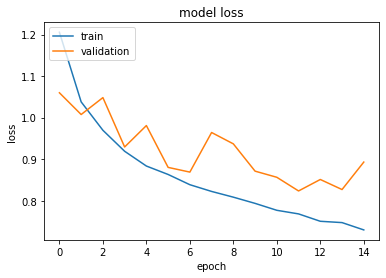

In [32]:
plotLosses(history)

In [33]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [34]:
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[0.9047172665596008, 0.7206000089645386]
